## Import Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

## Importing Dataset

In [56]:
diabetes=pd.read_csv('D:/Data Science/Data mining/diabetes-2-1.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

In [57]:
#To check if the dataset have any null value
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
#To check the data types of dataset
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [59]:
#Total number of rows and columns
print("Total number of rows:",diabetes.shape[0])
print("Total number of columns:",diabetes.shape[1])

Total number of rows: 768
Total number of columns: 9


In [60]:
#Statistical Summary
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
diabetes['Outcome'].value_counts()
#0 is non_diabetes
#1 is diabetes

0    500
1    268
Name: Outcome, dtype: int64

## Data Cleaning

In [62]:
diabetes.shape

(768, 9)

In [63]:
#Remove any duplicates
diabetes=diabetes.drop_duplicates()

In [64]:
#It shows that we dont have any duplicates in the dataset
diabetes.shape

(768, 9)

In [65]:
#Check any null/missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the statistical analysis we saw that the column Pregnancies Glucose, BloodPressure, SkinThickness, Insulin, BMI have minimum values of 0.   

The patient has 0 pregnancies is consider a valid point not a missing value.
We have 5 column with minimum/missing values.

In [66]:
#No of zero values in the dataset
diabetes.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [67]:
#Replace zeros with nan
Column_to_replace=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
diabetes[Column_to_replace]=diabetes[Column_to_replace].replace(0,np.nan)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Observation after replacing zero with NaN

In [68]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [69]:
#mean of outcome on the basis of all features
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


In [70]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Missing Value Analysis

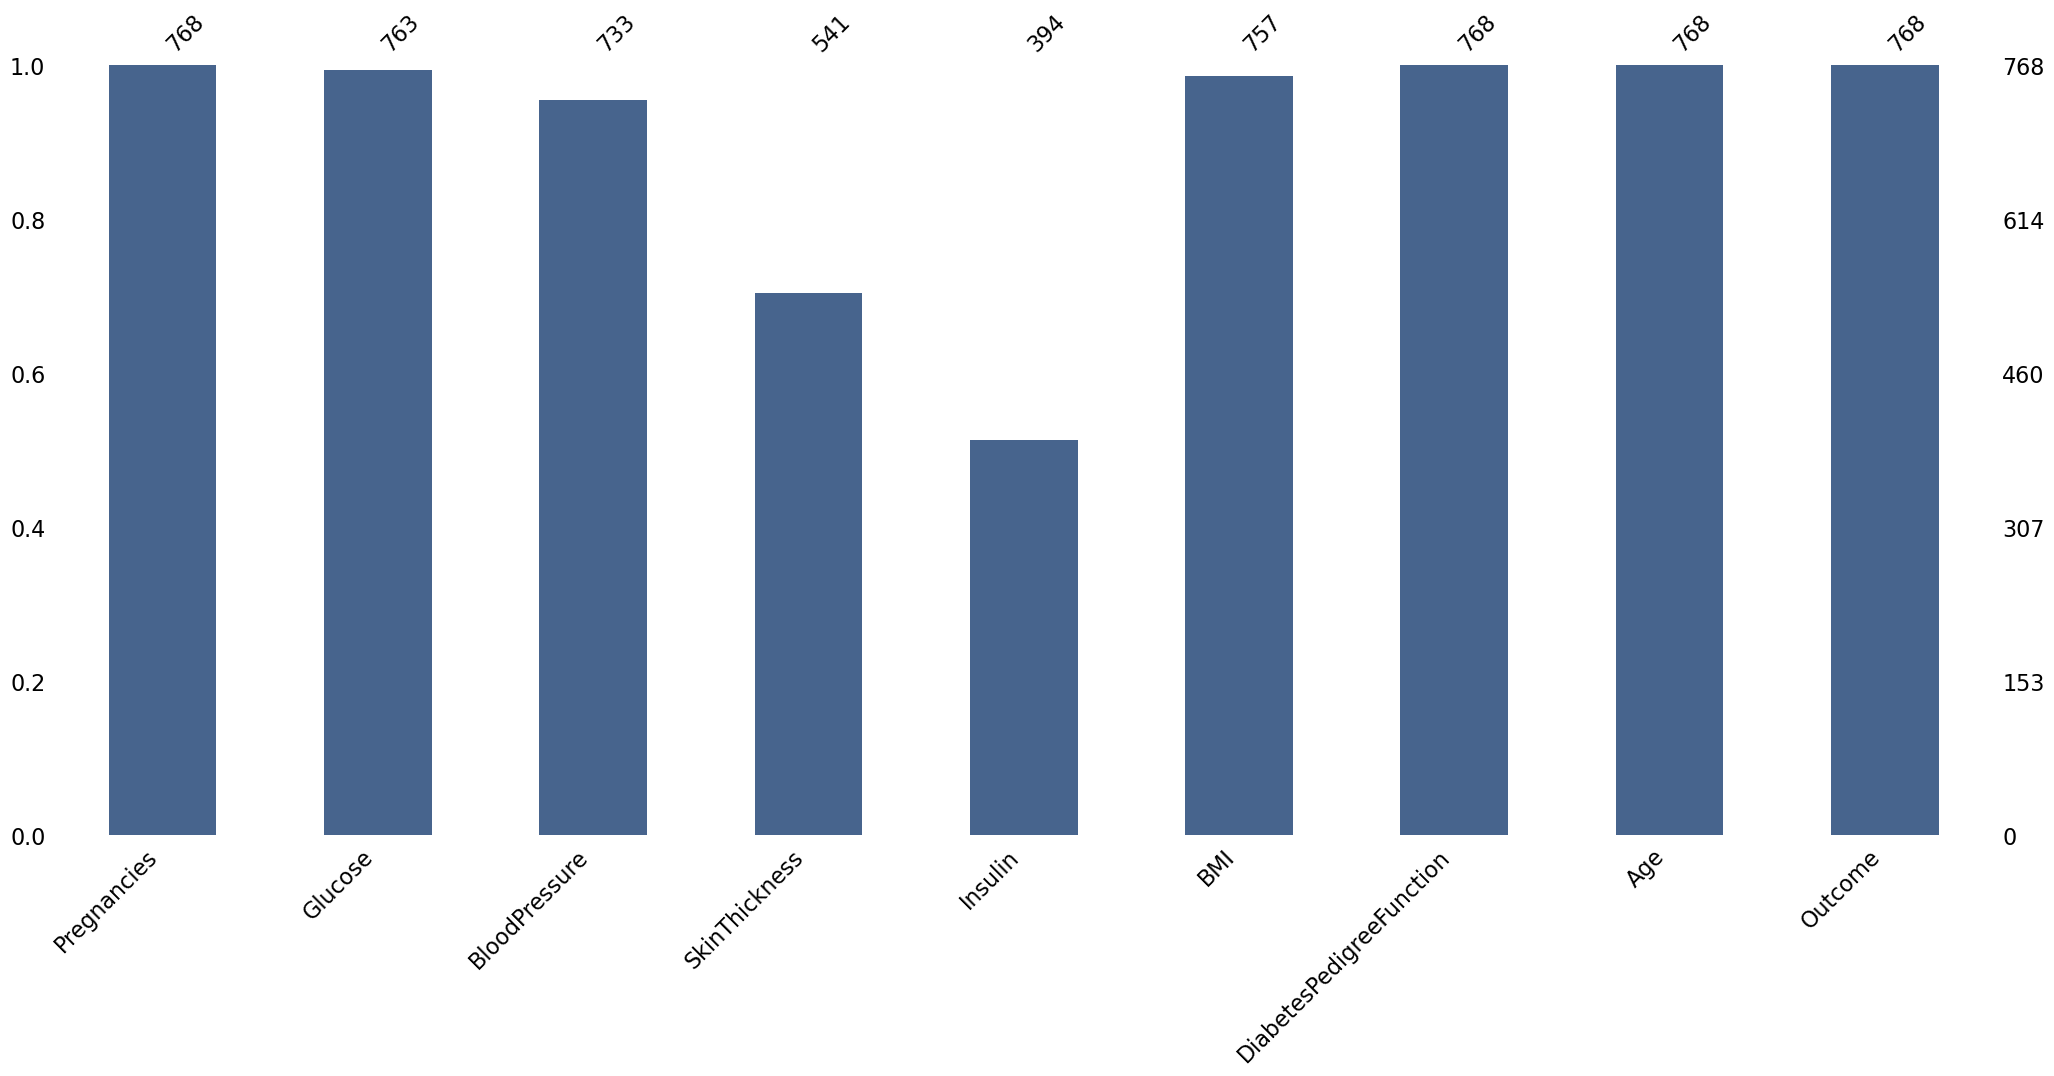

In [71]:
import missingno as msno
msno.bar(diabetes,color='#47648d')
plt.show()

### Replace NaN with mean 

In [72]:
# List of columns with zero values to be replaced with mean
zero_features_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data_mean = diabetes[zero_features_columns].mean()
diabetes[zero_features_columns] =diabetes[zero_features_columns].fillna(data_mean)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### Observation after replacing NaN with mean

In [73]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [74]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


# Exploratory Data Analysis

## Informative plots

([<matplotlib.axis.XTick at 0x20de1e4c940>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

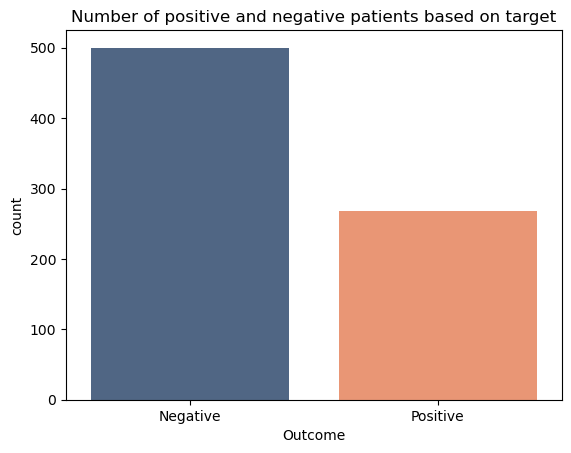

In [76]:
#Count plot to see number of positive and negative patients based on target and this show that data is imbalanced
colors='#47648d', '#fc8d62'
sns.countplot(x="Outcome",data=diabetes,palette=colors)
plt.title('Number of positive and negative patients based on target')
plt.xticks([0,1],["Negative","Positive"])

Histogram is one of the most common graph which is used to display numeric data. It shows distribution of data whether it is normally distributed or if its skewed

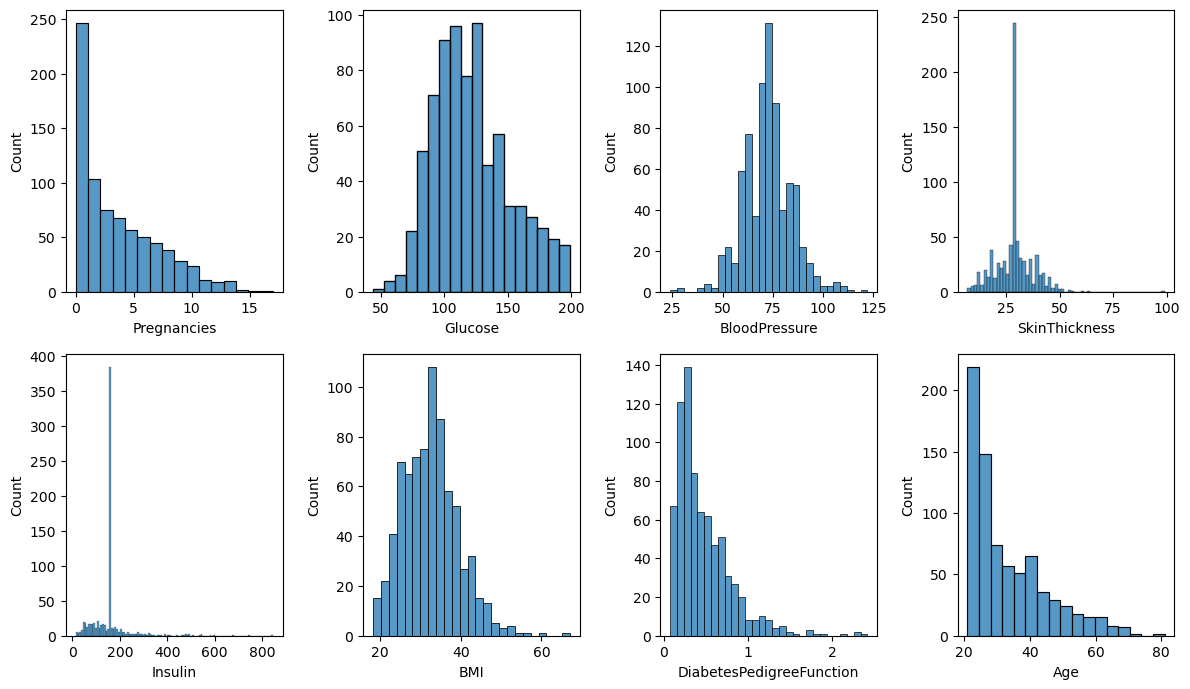

In [77]:
#Hist plot
df_hist = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(12, 10), dpi=100)

for i, column in enumerate(df_hist, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=diabetes, x=column)
           
    plt.tight_layout()

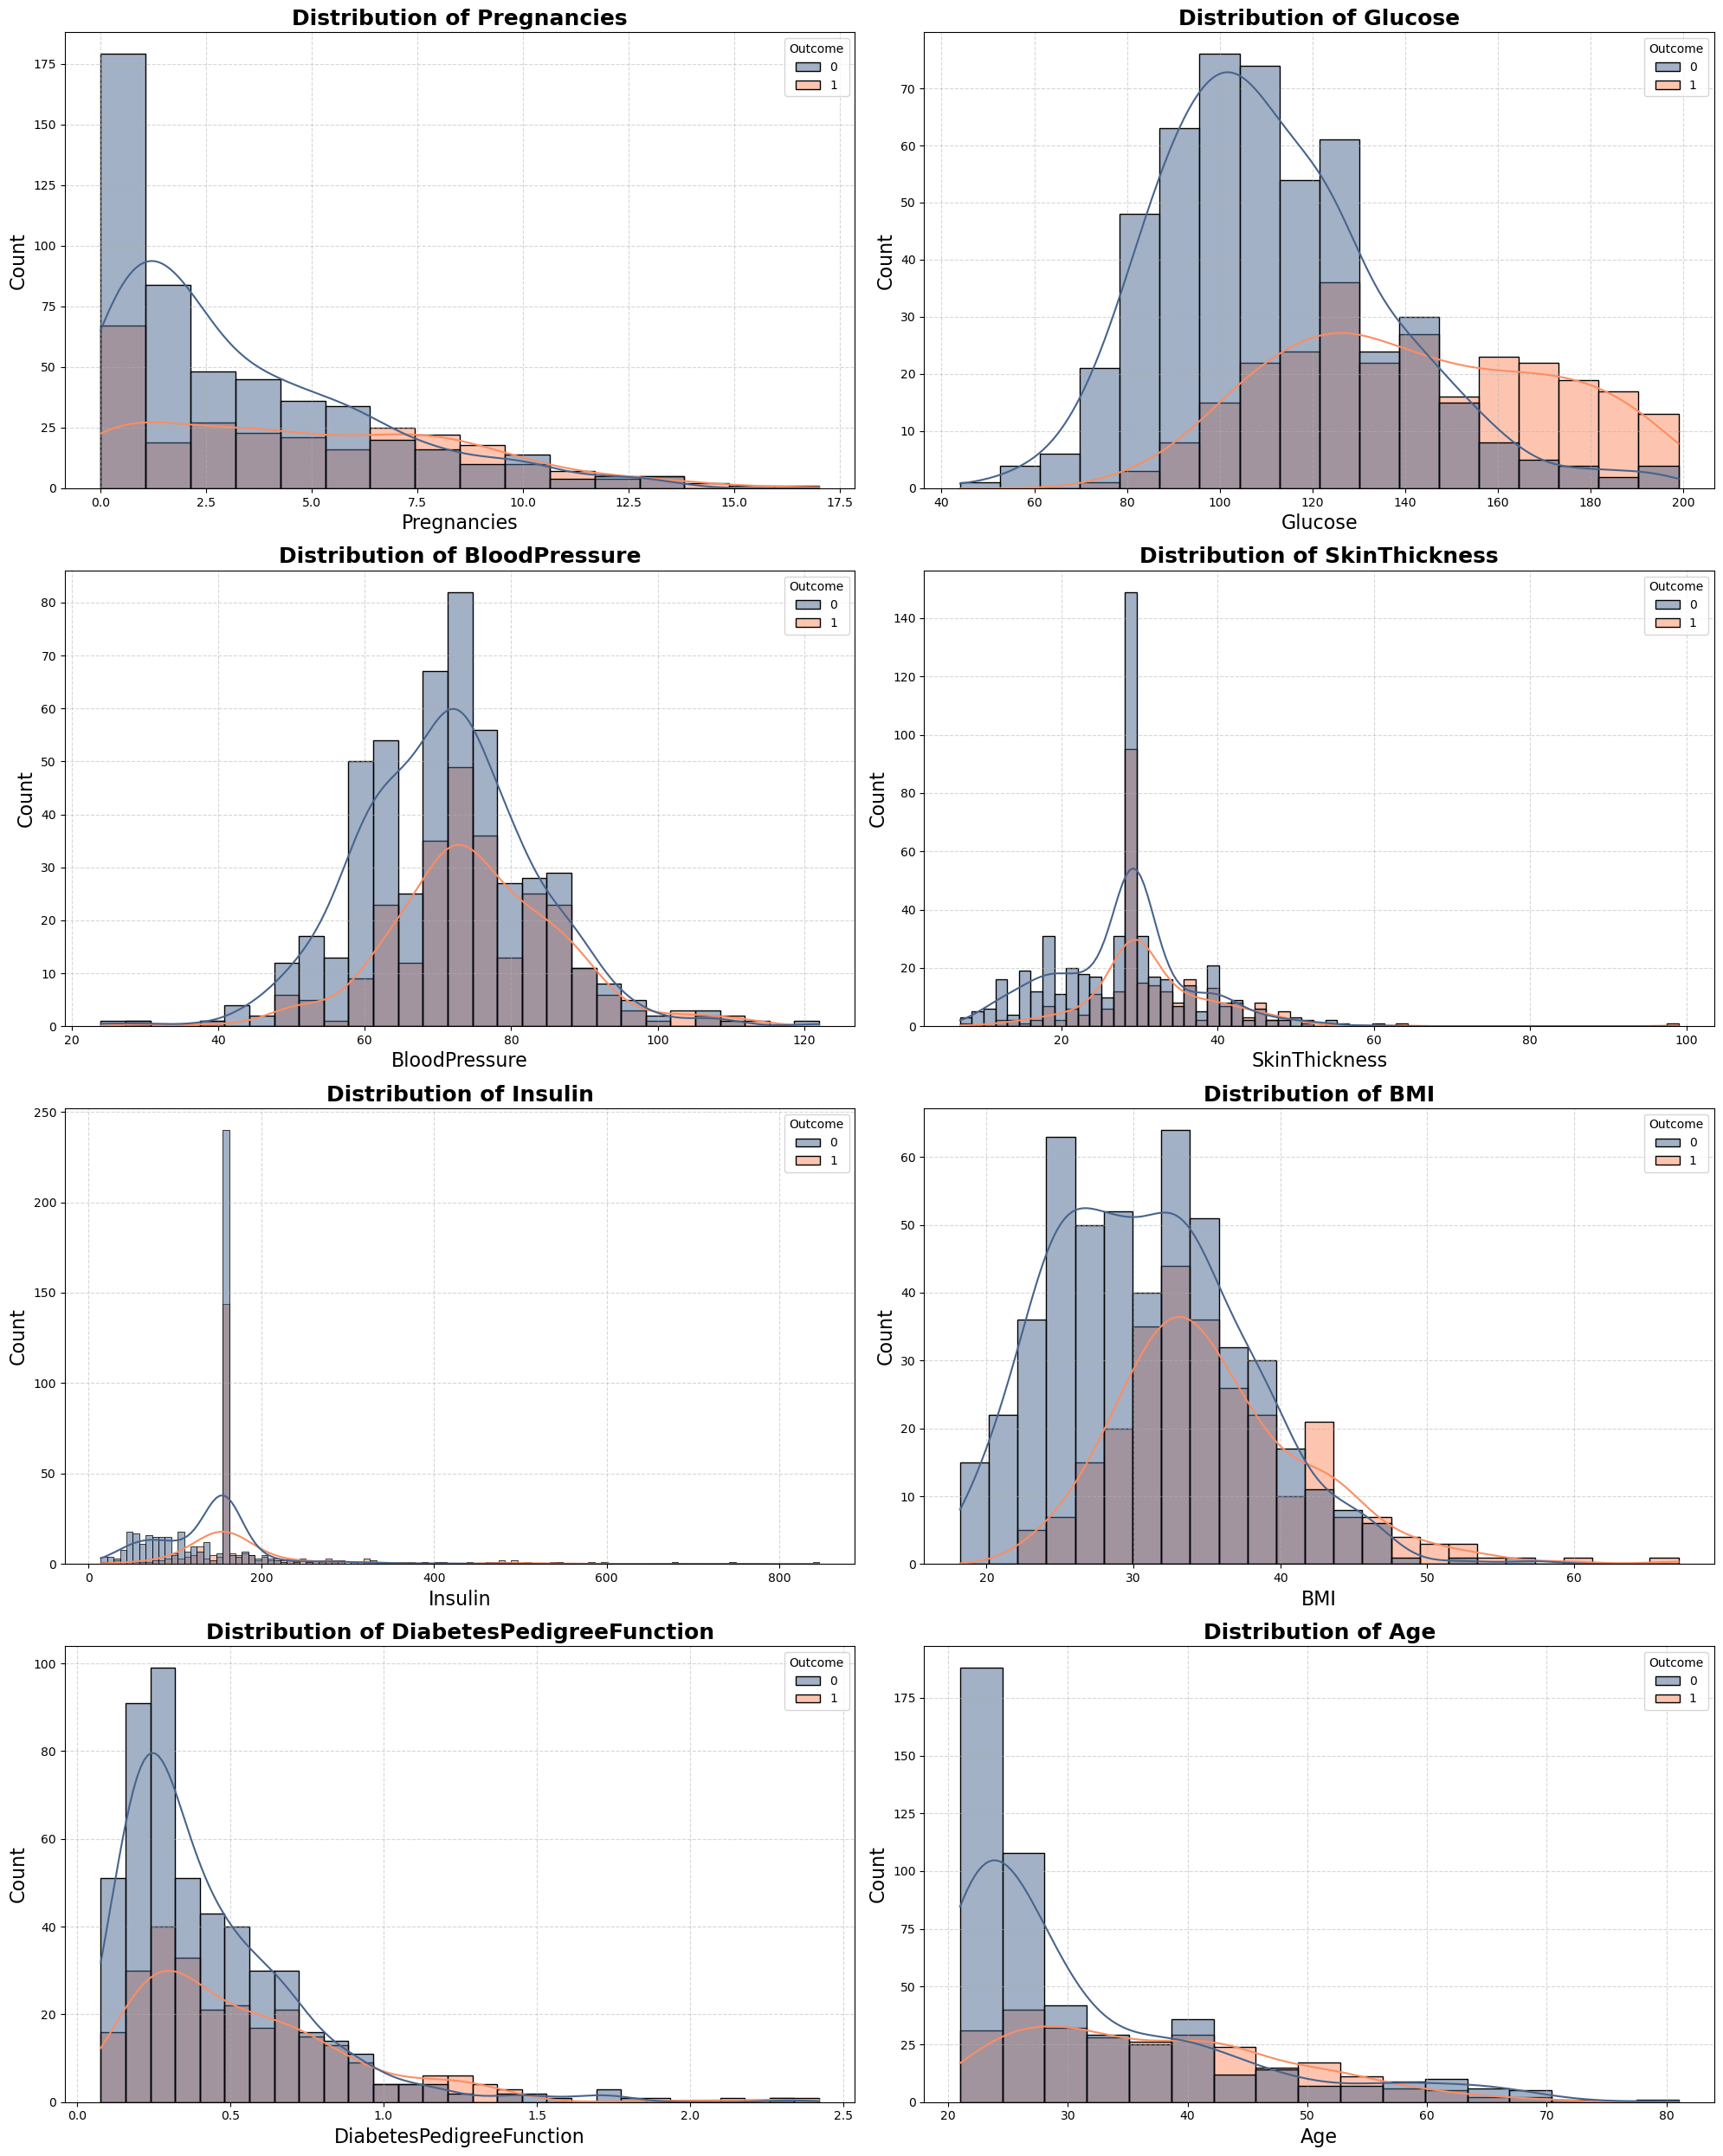

In [78]:
#Hist plot to see the distribution of data with respect to outcome
check_distribution = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

colors = ['#47648d', '#fc8d62']  # Green for Outcome 0, Orange for Outcome 1

plt.figure(figsize=(20, 25))

for i, feature in enumerate(check_distribution, start=1):
    plt.subplot(4, 2, i)
    sns.histplot(data=diabetes, x=feature, hue='Outcome', kde=True, palette=colors, edgecolor='black')
    plt.title(f"Distribution of {feature}", fontsize=18, fontweight='bold')
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    plt.tight_layout()

plt.show()

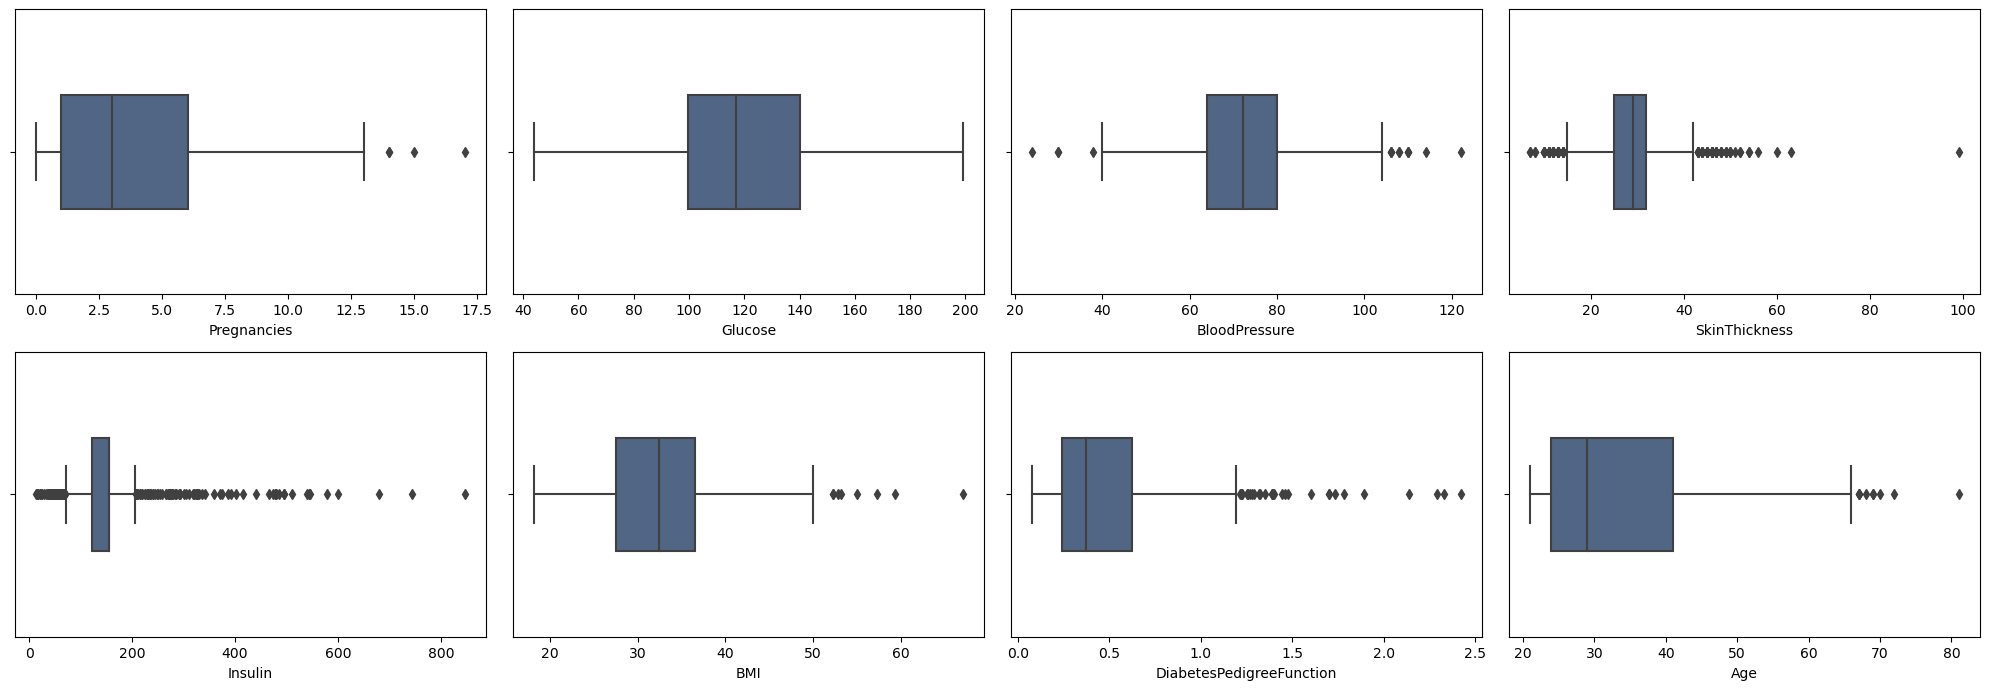

In [79]:
#Box plot to see the outliers
uni_colors = ['#47648d']
box_df = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

plt.figure(figsize=(20, 10), dpi=100)

for i, column in enumerate(box_df, start=1):
    plt.subplot(3, 4, i)
    
    sns.boxplot(data=diabetes, x=column, width=0.4, palette=uni_colors)
    
    plt.tight_layout()

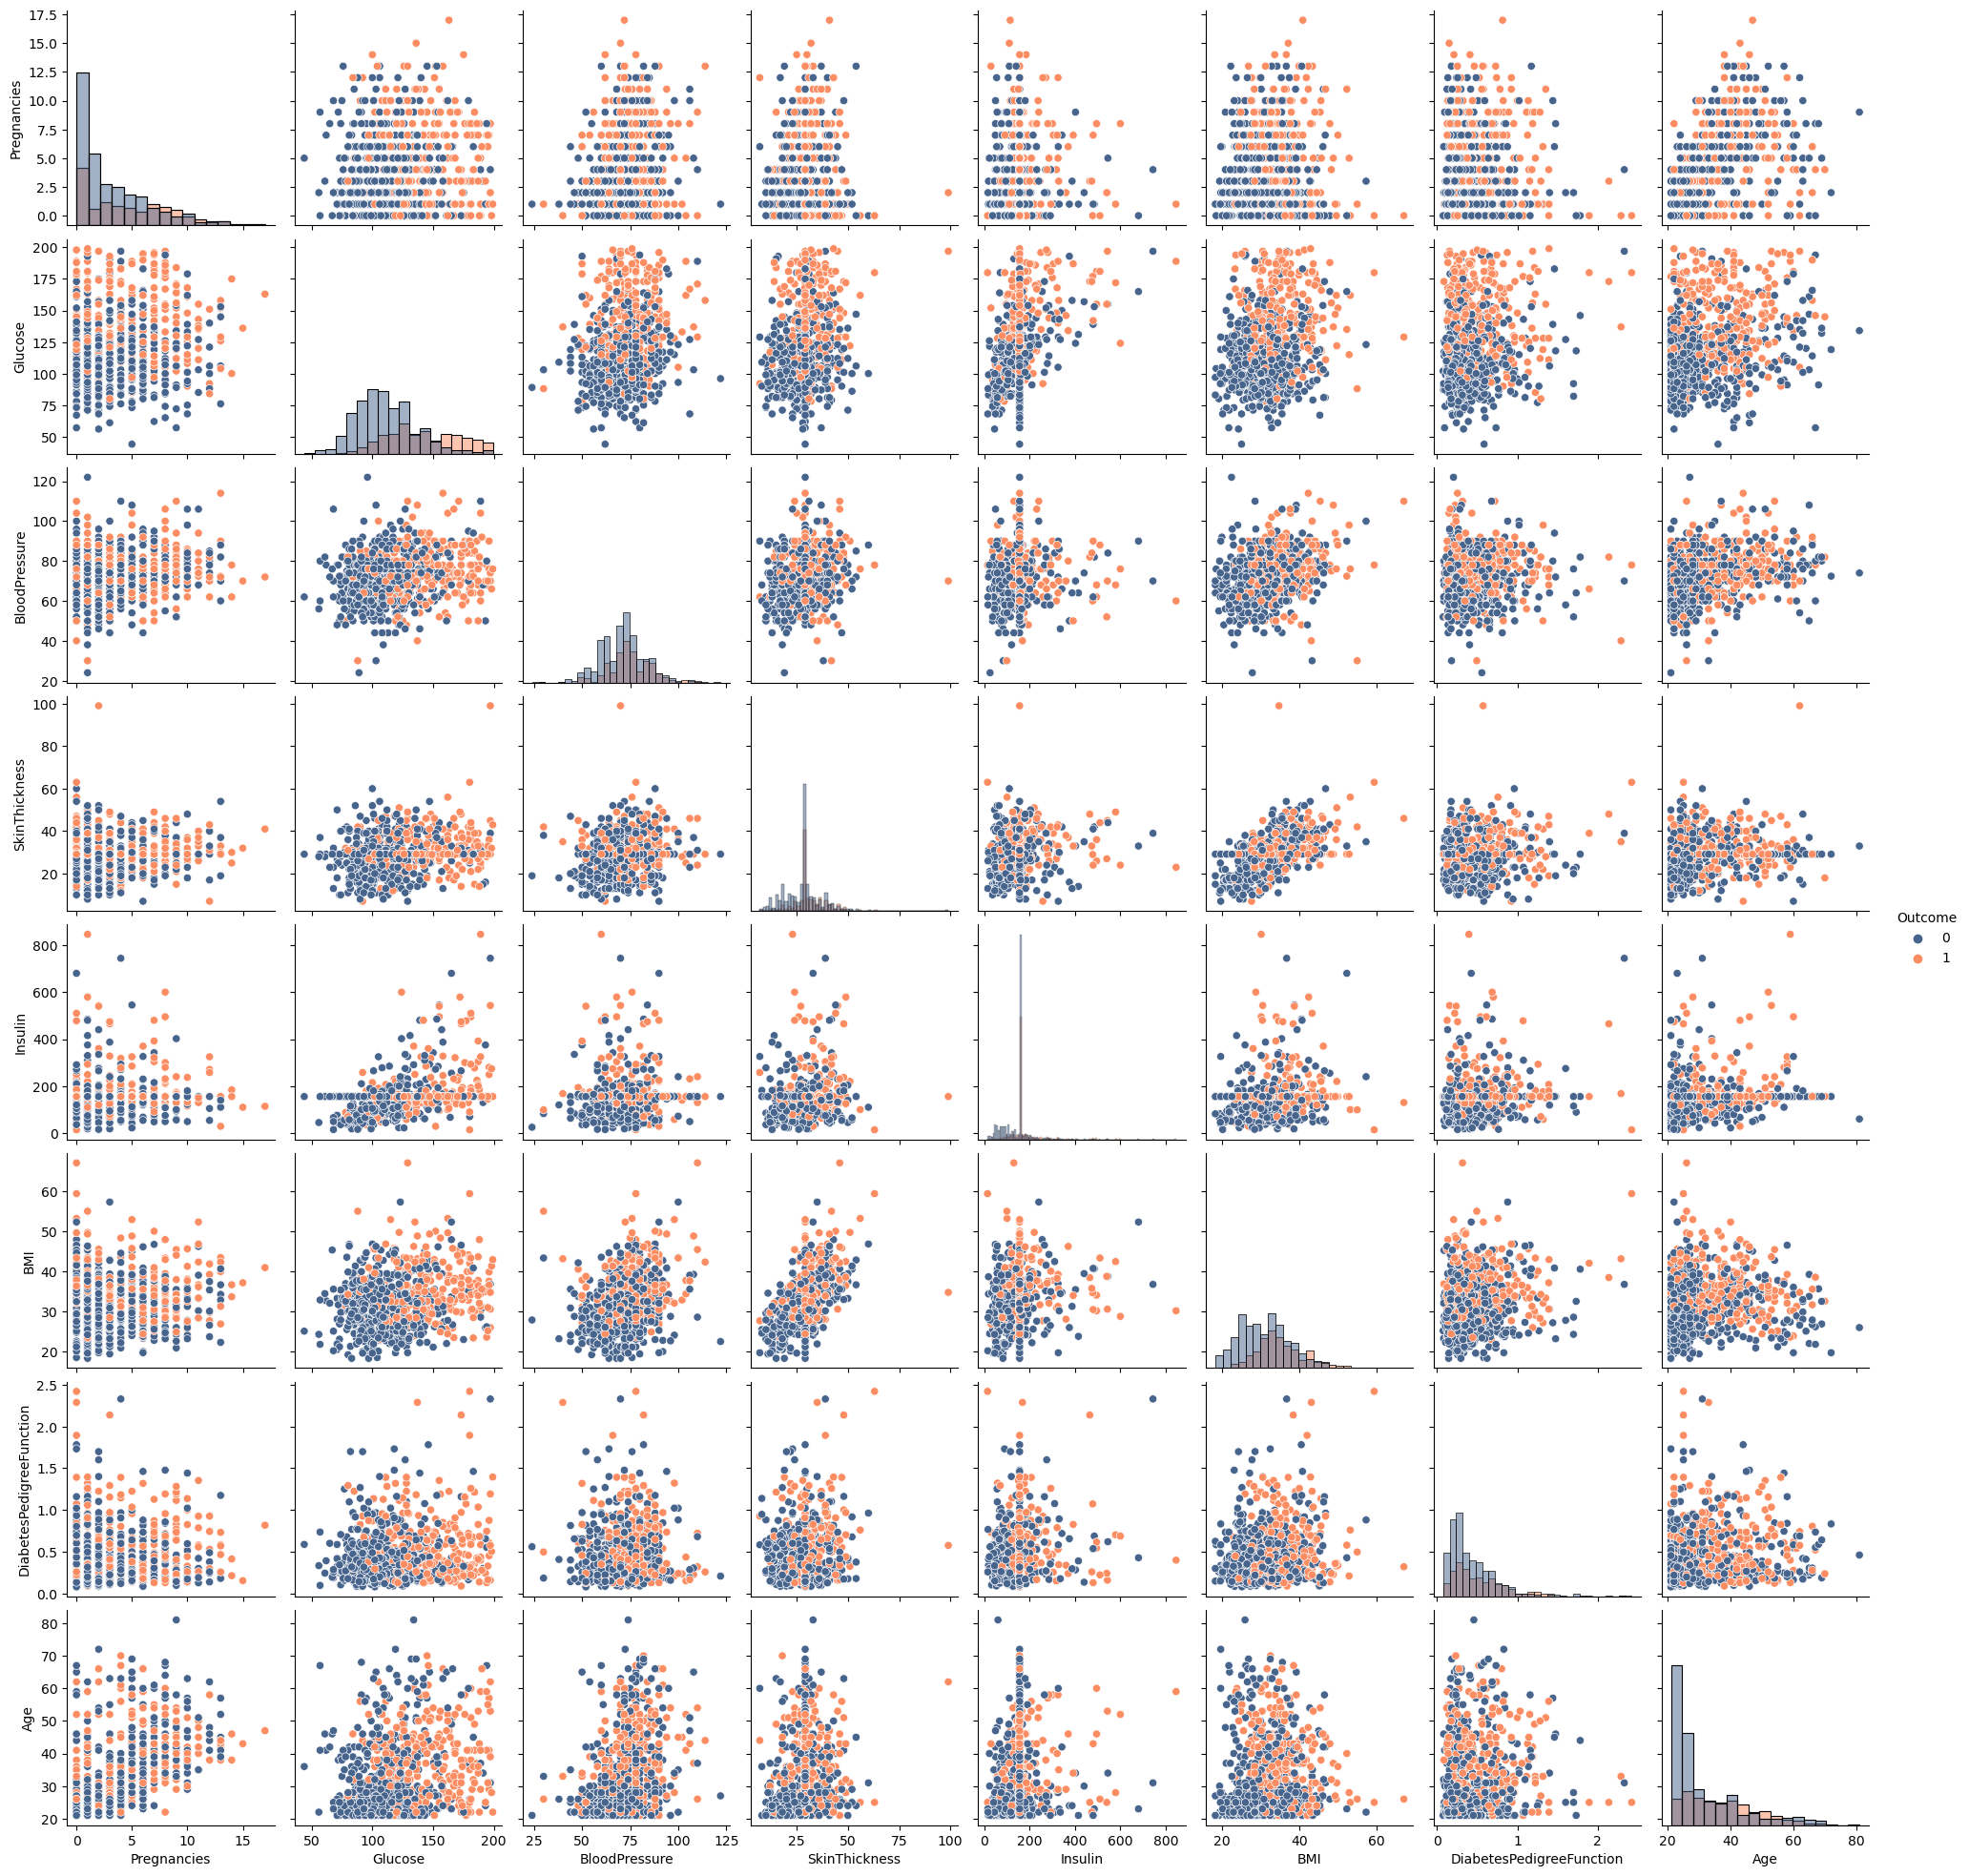

In [80]:
#Pair plot to see the correlation between different columns
sns.pairplot(diabetes, hue='Outcome', palette=colors,diag_kind='hist')
plt.show()

## Analyzing the correlation 

<Axes: >

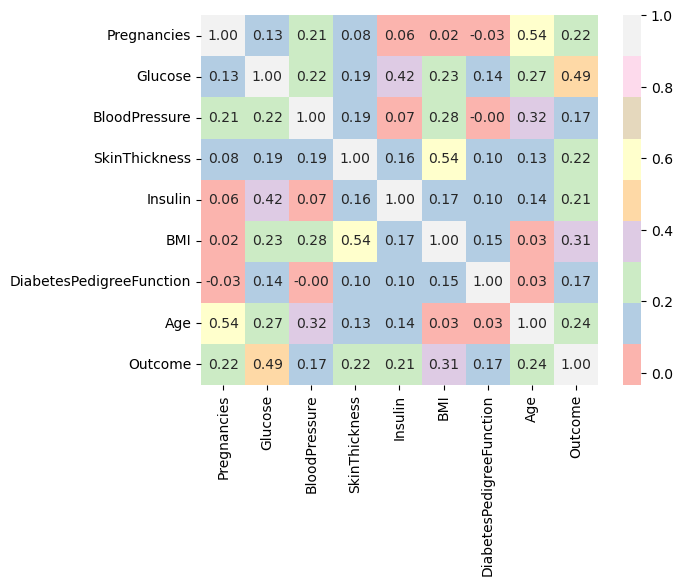

In [81]:
sns.heatmap(diabetes.corr(),annot=True,fmt=".2f",cmap="Pastel1")

In [82]:
#now we are drawing a heatmap that is showing which attributes are more correlated with the output
diabetes.corr()['Outcome'].sort_values(ascending=False) #this shows that glucose is more correlated

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

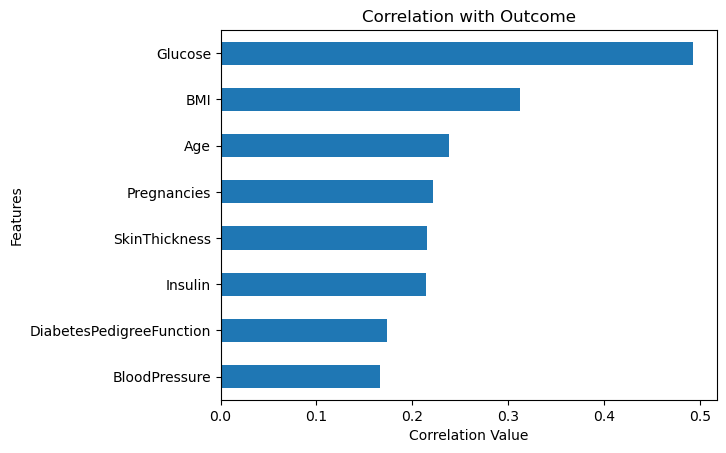

In [83]:
correlation_values = diabetes.drop('Outcome', axis=1).corrwith(diabetes['Outcome']).sort_values(ascending=True)

# Plotting
correlation_values.plot.barh()
plt.title('Correlation with Outcome')
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.show()



## Training of model

### Split dataset

In [84]:
X=diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']

### Apply Classification Algorithms

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

### Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
Lg=regression.fit(X_train,y_train)

#### KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn=neigh.fit(X_train,y_train)

#### Support Vector MAchine (SVM)

In [89]:
from sklearn.svm import SVC
classifier = SVC()
svm=classifier.fit(X_train,y_train)

#### Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Making Predictions

#### Predicting the response for test dataset

In [92]:
y_pred_1=Lg.predict(X_test)

In [93]:
y_pred_2=knn.predict(X_test)

In [94]:
y_pred_3=svm.predict(X_test)

In [95]:
y_pred_4=clf.predict(X_test)

In [96]:
y_pred_5=rf.predict(X_test)

## Model Evaluation

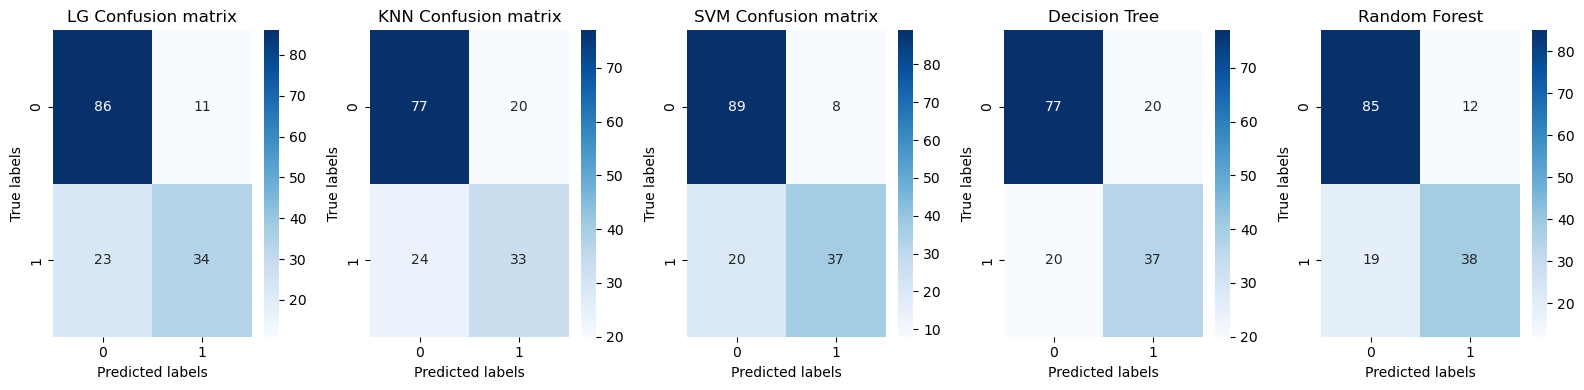

In [97]:
# Compute confusion matrices for each model
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_4 = confusion_matrix(y_test, y_pred_4)
cm_5 = confusion_matrix(y_test, y_pred_5)

# Function to plot confusion matrices
def plot_confusion_matrix(confusion_matrices, titles):
    matrix_num = len(confusion_matrices)  # Determine the number of confusion matrices to plot
    fig, axes = plt.subplots(1, matrix_num, figsize=(16,4))  # Create subplots for each confusion matrix
    
    # Loop through each confusion matrix and corresponding title
    for i, (cm, title) in enumerate(zip(confusion_matrices, titles)):
        ax = axes[i]  # Select the current subplot
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)  # Plot heatmap of confusion matrix
        ax.set_xlabel('Predicted labels')  # Set x-axis label
        ax.set_ylabel('True labels')  # Set y-axis label
        ax.set_title(title)  # Set title for the subplot
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show the plot

# List of confusion matrices and corresponding titles
confusion_matrices = [cm_1, cm_2, cm_3, cm_4, cm_5]
titles = ["LG Confusion matrix", "KNN Confusion matrix", "SVM Confusion matrix", 'Decision Tree', 'Random Forest']

# Plot confusion matrices
plot_confusion_matrix(confusion_matrices, titles)


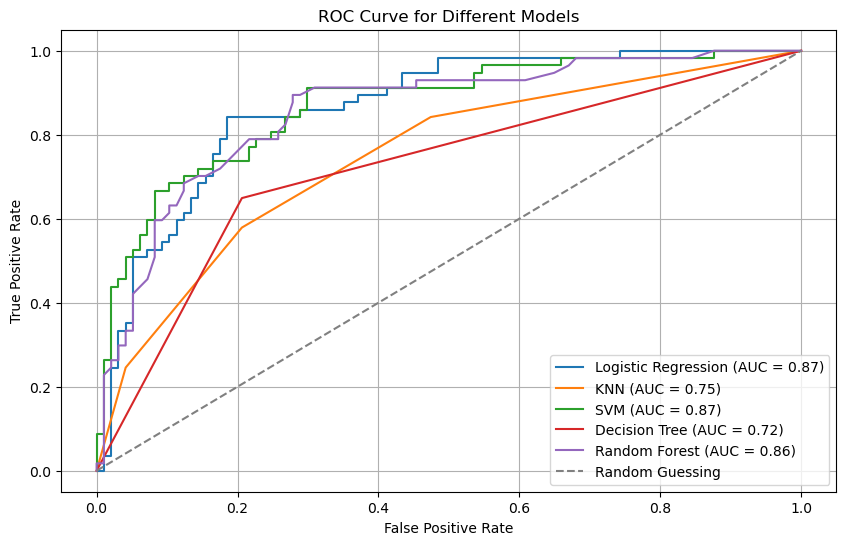

In [98]:
# Compute predicted probabilities for each model
y_probs = [Lg.predict_proba(X_test)[:, 1], knn.predict_proba(X_test)[:, 1], 
           svm.decision_function(X_test), clf.predict_proba(X_test)[:, 1], 
           rf.predict_proba(X_test)[:, 1]]

# Compute false positive rate (fpr) and true positive rate (tpr) for each model
fprs, tprs, model_names, aucs = [], [], [], []
for name, y_prob in zip(["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest"], y_probs):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    fprs.append(fpr)
    tprs.append(tpr)
    model_names.append(name)
    aucs.append(auc)

# Plot ROC curve for each model
plt.figure(figsize=(10, 6))
for fpr, tpr, name, auc in zip(fprs, tprs, model_names, aucs):
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
#Function to print performance scores of different models.
def print_scores(model_names, y_true, y_preds):
    results = []  # Initialize an empty list to store results
    for model_name, y_pred in zip(model_names, y_preds):
        # Calculate performance metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        # Append results to the list
        results.append([model_name, accuracy, precision, recall, f1])
    
    # Create a DataFrame from the results list
    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    # Sort the DataFrame by accuracy in descending order
    df_sorted = df.sort_values(by='Accuracy', ascending=False)
    # Print the sorted DataFrame without index
    print(df_sorted.to_string(index=False))

# List of model names and predicted labels for each model
model_names = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest"]
y_preds = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]

# Call the function to print performance scores
print_scores(model_names, y_test, y_preds)


              Model  Accuracy  Precision   Recall       F1
                SVM  0.818182   0.822222 0.649123 0.725490
      Random Forest  0.798701   0.760000 0.666667 0.710280
Logistic Regression  0.779221   0.755556 0.596491 0.666667
      Decision Tree  0.740260   0.649123 0.649123 0.649123
                KNN  0.714286   0.622642 0.578947 0.600000


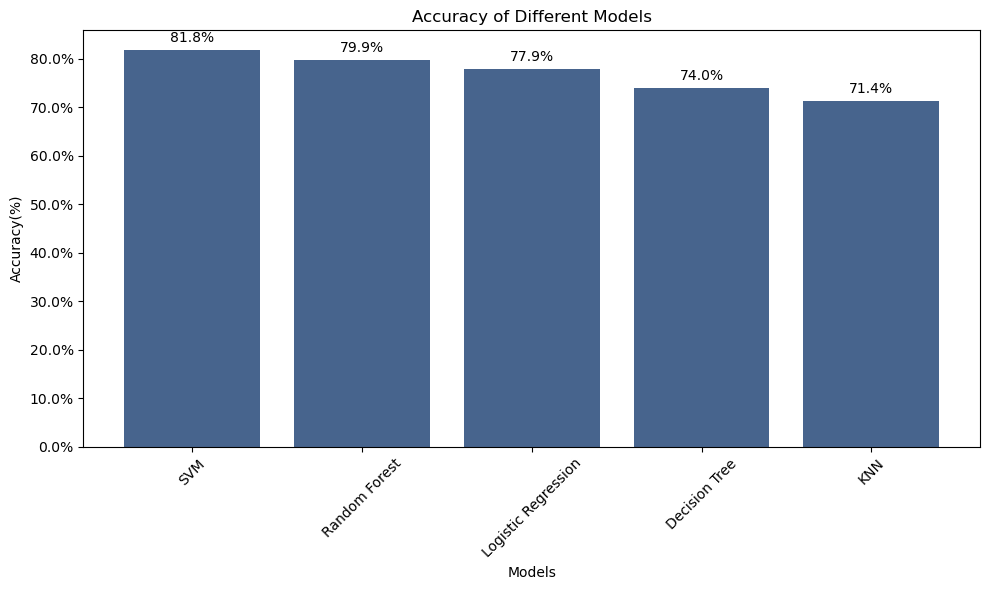

In [100]:
#Function to plot accuracy of different models.
def plot_accuracy(model_names, accuracies):
    # Sort model names and accuracies based on accuracies
    sorted_data = sorted(zip(model_names, accuracies), key=lambda x: x[1], reverse=True)
    sorted_model_names, sorted_accuracies = zip(*sorted_data)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_model_names, sorted_accuracies, color='#47648d')
    plt.xlabel('Models')
    plt.ylabel('Accuracy(%)')
    plt.title('Accuracy of Different Models')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))

    # Adding accuracy labels on top of bars
    for bar, acc in zip(bars, sorted_accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bar.get_height() + 0.01, 
                 f'{acc*100:.1f}%', 
                 ha='center', 
                 va='bottom')

    plt.tight_layout()
    plt.show()

# List of model names and predicted labels for each model
model_names = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest"]
y_preds = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]

# Calculate accuracies for each model
accuracies = [accuracy_score(y_test, y_pred) for y_pred in y_preds]

# Call the function to plot accuracy
plot_accuracy(model_names, accuracies)
